In [70]:
from multiprocessing import Pool, cpu_count

import cv2
import numpy as np
import tensorflow as tf
from PIL import Image
from tqdm import tqdm

In [120]:
N = 100
F = '/kaggle/input/plant-pathology-2021-fgvc8/test_images/ad8770db05586b59.jpg'
S = (600, 600)
Z = 2.

In [72]:
! lscpu | grep 'CPU(s)'

CPU(s):              4
On-line CPU(s) list: 0-3
NUMA node0 CPU(s):   0-3


In [123]:
def _resize_tf_x2(_, path=F, size=S, zoom=Z):
    
    # decode jpeg
    x = tf.io.read_file(path)
    x = tf.image.decode_jpeg(x, channels=3)
    
    # zoom=1
    x1 = tf.image.resize(x,size,method=tf.image.ResizeMethod.BICUBIC)
    x1 = x1.numpy().astype(np.uint8)
    
    # zoom=zoom
    x2 = tf.image.resize(x,(int(size[0]*zoom), int(size[1]*zoom)),method=tf.image.ResizeMethod.BICUBIC)
    x2 = x2.numpy().astype(np.uint8)
    
    # center crop
    x2 = Image.fromarray(x2)
    left = (x2.width - size[0]) / 2
    top = (x2.height - size[1]) / 2
    right = (x2.width + size[0]) / 2
    bottom = (x2.height + size[1]) / 2
    x2 = x2.crop((left, top, right, bottom))
    x2 = np.array(x2)
    
    assert x1.shape == size + (3,)
    assert x1.dtype == np.uint8
    
    assert x2.shape == size + (3,)
    assert x2.dtype == np.uint8

    return x1, x2

def _resize_tf_x2_2(_, path=F, size=S, zoom=Z):
    
    # decode jpeg
    x = tf.io.read_file(path)
    x = tf.image.decode_jpeg(x, channels=3)
    
    # zoom=1
    x1 = tf.image.resize(x,size,method=tf.image.ResizeMethod.BICUBIC)
    x1 = x1.numpy().astype(np.uint8)
    
    # zoom=zoom
    x2 = tf.image.resize(x,(int(size[0]*zoom), int(size[1]*zoom)),method=tf.image.ResizeMethod.BICUBIC)
    x2 = x2.numpy().astype(np.uint8)
    
    # center crop
    hor = (x2.shape[0] - size[0]) // 2
    ver = (x2.shape[1] - size[1]) // 2
    x2 = x2[ver:-ver, hor:-hor,:]
    
    assert x1.shape == size + (3,)
    assert x1.dtype == np.uint8
    
    assert x2.shape == size + (3,)
    assert x2.dtype == np.uint8

    return x1, x2


def _resize_tf(_):
    x = tf.io.read_file(F)
    x = tf.image.decode_jpeg(x, channels=3)
    x = tf.image.resize(
        x,
        S,
        method=tf.image.ResizeMethod.BICUBIC,
    ).numpy().astype(np.uint8)
    assert x.shape == S + (3,)
    assert x.dtype == np.uint8
    return x

def _resize_PIL(_):
    x = Image.open(F)
    x = x.resize(S, Image.BICUBIC)
    x = np.array(x)
    assert x.shape == S + (3,)
    assert x.dtype == np.uint8
    return x
    
def _resize_cv2(_):
    x = cv2.imread(F)
    x = cv2.cvtColor(x, cv2.COLOR_BGR2RGB)
    x = cv2.resize(x, S, interpolation=cv2.INTER_CUBIC)
    assert x.shape == S + (3,)
    assert x.dtype == np.uint8
    return x

def _resize_cv2_PIL(_):
    x = cv2.imread(F)
    x = cv2.cvtColor(x, cv2.COLOR_BGR2RGB)
    x = Image.fromarray(x)
    x = x.resize(S, Image.BICUBIC)
    x = np.array(x)
    assert x.shape == S + (3,)
    assert x.dtype == np.uint8
    return x

In [74]:
with Pool(cpu_count()) as pool:
    X = list(
        tqdm(
            pool.imap(
                _resize_cv2,
                range(N),
            ),
            total=N,
            smoothing=0,
        )
    )

100%|██████████| 100/100 [00:06<00:00, 14.91it/s]


In [80]:
for i in tqdm(range(N), smoothing=0):
    _resize_tf(i)

100%|██████████| 100/100 [00:05<00:00, 17.97it/s]


In [76]:
for i in tqdm(range(N), smoothing=0):
    _resize_PIL(i)

100%|██████████| 100/100 [00:23<00:00,  4.31it/s]


In [77]:
for i in tqdm(range(N), smoothing=0):
    _resize_cv2(i)

100%|██████████| 100/100 [00:14<00:00,  6.85it/s]


In [78]:
for i in tqdm(range(N), smoothing=0):
    _resize_cv2_PIL(i)

100%|██████████| 100/100 [00:24<00:00,  4.02it/s]


In [87]:
for i in tqdm(range(N), smoothing=0):
    _resize_tf_x2(i)

100%|██████████| 100/100 [00:10<00:00,  9.23it/s]


In [125]:
for i in tqdm(range(N), smoothing=0):
    _resize_tf_x2_2(i)

100%|██████████| 100/100 [00:10<00:00,  9.36it/s]


In [102]:
_, x = _resize_tf_x2(0)

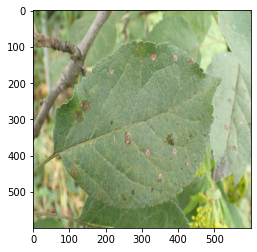

In [113]:
plt.imshow(_)

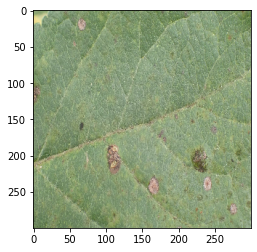

In [124]:
ver = 150
hor = 150
plt.imshow(_[ver:-ver, hor:-hor,:])